In [617]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import plotly.express as px
import altair as alt
import seaborn as sns

In [618]:
df = pd.read_csv('../vehicles_us.csv')

Imported the necessary libraries

Downloaded the dataset

In [619]:
# Print general summary of the information in the dataset
df.info()
print('')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB



,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [620]:
# Check for duplicates
duplicates = df.duplicated().sum()
print('Number of duplicates: ', duplicates)

Number of duplicates:  0


The initial exploration of the data shows the following:
There are 51525 entries in this data set

There are 13 columns in this data set that are as follows:

    Price- price of the car

    model_year - year of the cars

    model- model of the car

    condition- condition of the car

    cylinders- number of engine cylinders

    fuel - type of fuel

    odometer- mileage on the vehicle at the time of the ad

    transmission- type of transmission

    paint_color- color of the car

    is-4wd- if the car has 4 wheel drive

    date_posted- the date the ad was posted

    days_listed- the number of days the ad ran 

Entries are missing for year_model, cylinders, odometer, paint_color, and is-4wd

dtypes include: float64(4), int64(2), and object(7)

No duplicate entries were found
    

In [621]:
display(df.head(10))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [622]:
# Explore distribution of values in every column
for column in df.columns:
    print(df[column].value_counts(dropna=False))

price
1        798
6995     719
5995     655
4995     624
3500     620
        ... 
47665      1
22545      1
41700      1
6509       1
7670       1
Name: count, Length: 3443, dtype: int64
model_year
NaN       3619
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: count, Length: 69, dtype: int64
model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64
condition
excellent    24773
good         20145
like new      4742
fair          1607
new 

In [623]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

No duplicates were found

In [624]:
# Check for missing values
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Further exploration of the missing values to get a missiung value count for each column.

Next steps: Handling Missing Data

Missing data types will be handled in the following way.
For the  is_4wd, this column should be a Boolean value with 1 = True and 0 = False

For the missing paint_colors, I will replace with the string 'unknown'.

For the missing values in model_year and cylinders, I will use the median values for each model of car to replace the missing values to prevent skewing the data too much.

For the missing values in odometer, I will use the median value based on the condition of the car to replace the missing values to prevent from skewing the data too much.

In [625]:
# Get the value counts for the is_4wd column
df['is_4wd'].value_counts(dropna=False)

is_4wd
NaN    25953
1.0    25572
Name: count, dtype: int64

In [626]:
# Replace missing values in is_4wd column with 0
df['is_4wd'] = df['is_4wd'].fillna(0)

# Recheck the value counts for the is_4wd column
df['is_4wd'].value_counts(dropna=False)

is_4wd
0.0    25953
1.0    25572
Name: count, dtype: int64

All missing values have been replaced using the Boolean values 0 = False and 1 = True

In [627]:
# Check for the missing values in the paint_color column
df['paint_color'].isna().sum()

np.int64(9267)

In [628]:
# Check all the values in the paint_color column
df['paint_color'].value_counts(dropna=False)

paint_color
white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

In [629]:
# Fill in missing values with the string 'unknown'
df['paint_color'] = df['paint_color'].fillna('unknown')

# Recheck the value counts for the paint_color column
df['paint_color'].value_counts(dropna=False)

paint_color
white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: count, dtype: int64

All missing values have been replaced with the string 'unknown'

In [630]:
# Check for missing values in the model_year column
df['model_year'].value_counts(dropna=False)

model_year
NaN       3619
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: count, Length: 69, dtype: int64

In [631]:
# Check median in model_year column grouped by model
df.groupby('model')['model_year'].median()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

In [632]:
# Replace missing values in the model_year column with the median values for each model
df['model_year'] = df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))

# Recheck the missing values in the model_year column
df['model_year'].value_counts(dropna=False)

model_year
2011.0    4017
2013.0    3994
2012.0    3982
2014.0    3540
2008.0    3462
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: count, Length: 70, dtype: int64

In [633]:
# Recheck median model_year column grouped by model
df.groupby('model')['model_year'].median()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

Each missing model_year has been replaced with the median year that coinciding with each model

In [634]:
# Check for missing values in the cylinder column
df['cylinders'].value_counts(dropna=False)

cylinders
8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: count, dtype: int64

In [635]:
# Check median in cylinders column grouped by model
df.groupby('model')['cylinders'].median()

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64

In [636]:
# Replace missing values in the cylinders column with the median values for each model
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))

# Recheck the missing values in the cylinders column
df['cylinders'].value_counts(dropna=False)

cylinders
8.0     17712
6.0     17435
4.0     15499
10.0      549
5.0       294
3.0        34
12.0        2
Name: count, dtype: int64

In [637]:
# Recheck median in cylinders column grouped by model
df.groupby('model')['cylinders'].median()

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64

Each missing cylindar value has been replaced with the median cylinder value that coinciding with each model

In [638]:
# Check values in the odometer column
df['odometer'].value_counts(dropna=False)

odometer
NaN         7892
0.0          185
140000.0     183
120000.0     179
130000.0     178
            ... 
47750.0        1
181645.0       1
105656.0       1
138608.0       1
129644.0       1
Name: count, Length: 17763, dtype: int64

In [639]:
# Check median in odometer column grouped by condition
df.groupby('condition')['odometer'].median()

condition
excellent    104230.0
fair         181613.0
good         129000.0
like new      72982.5
new            8002.0
salvage      142673.5
Name: odometer, dtype: float64

In [640]:
# Replace missing values in the odometer column with the median values for each condition
df['odometer'] = df.groupby('condition')['odometer'].transform(lambda x: x.fillna(x.median()))

# Recheck the missing values in the odometer column
df['odometer'].value_counts(dropna=False)

odometer
104230.0    3803
129000.0    3199
72982.5      728
181613.0     237
0.0          185
            ... 
111450.0       1
47750.0        1
181645.0       1
105656.0       1
138608.0       1
Name: count, Length: 17765, dtype: int64

In [641]:
# Recheck median in odometer column grouped by condition
df.groupby('condition')['odometer'].median()

condition
excellent    104230.0
fair         181613.0
good         129000.0
like new      72982.5
new            8002.0
salvage      142673.5
Name: odometer, dtype: float64

Each missing odometer value has been replaced with the median value based on the condition

In [642]:
# Recheck for missing values
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

All missing values have been resolved.

In [643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Next steps: Changing data types

Several of the column data types do not coincide with the data found in the column.

I will change the model_year from float64 to int type

I will change cylinders from float64 to int type

I will change odometer from float64 to int type

I will change is_4wd from float64 to Boolean type

I will change date_posted from object to Datetime format

In [644]:
# Change model_year, cylinders, and odometer columns to integer data type
df['model_year'] = df['model_year'].astype('int')  

df['cylinders'] = df['cylinders'].astype('int')  

df['odometer'] = df['odometer'].astype('int')  


In [645]:
# Change is_4wd column to boolean data type
df['is_4wd'] = df['is_4wd'].astype(bool)

In [646]:
# Change date_posted column to datetime data type
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [647]:
# Check the data types of the columns
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

All data types were successfully converted

Next Steps: Adding Columns

To assist with the exploration of the data, I am going to add four new columns to the dataframe.

The first column that I am going to add is going to be a column that shows the age of the car at the time the ad was posted.

The fourth column is going to show the month and year the car ad was posted.

The third column that I am going to add is going to show the average milage per year for each car.

The fourth column that I am going to add is going to show the make for each car.


In [648]:
# Add a new column that calculates the vehicle's age when the ad was placed
df['vehicle_age'] = df['date_posted'].dt.year - df['model_year']

In [649]:
# Add a new column that shows the month and year the ad was placed
df['month_year'] = df['date_posted'].apply(lambda x: x.strftime('%Y-%m')) 


In [650]:
# Add a new column that calculates the vehicle's average mileage per year rounded to the nearest whole number   
df['average_mileage'] = df['odometer'] / df['vehicle_age']
df['average_mileage'] = df['average_mileage'].round(0)

In [651]:
# Display the first few rows of the modified dataset
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,month_year,average_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,7,2018-06,20714.0
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,7,2018-10,12672.0
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,2019-02,18333.0
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,16,2019-03,11351.0
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,2019-04,40452.0
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,4,2018-06,14488.0
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,2018-12,26404.0
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,6,2019-01,18246.0
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,6,2018-07,17362.0
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,11,2019-02,13381.0


In [652]:
# display information about the dataset to check for missing values in the new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  int64         
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  vehicle_age      51525 non-null  int64         
 14  month_year       51525 non-null  objec

When looking at the data, I see that there are two missing values for my average_mileage column.

In [653]:
# Display rows with missing values in the new columns
df[df['vehicle_age'].isna()]

df[df['average_mileage'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,month_year,average_mileage
17037,45400,2018,ram 3500,excellent,6,diesel,0,automatic,pickup,black,True,2018-12-16,18,0,2018-12,NaN
40489,15900,2018,toyota prius,excellent,4,hybrid,0,automatic,hatchback,blue,False,2018-07-30,31,0,2018-07,NaN


I see that the vehicles age is listed as 0 year. I want to replace all vehicle age values that are zero with 1. 

I want to replace all missing values for mileage with 0.

In [654]:
# Replace values of 0 in the vehicle_age column with 1
df['vehicle_age'] = df['vehicle_age'].replace(0, 1)

# Replave missing values in the average_mileage column with 0
df['average_mileage'] = df['average_mileage'].fillna(0)

In [655]:
# Check for 0 values in the vehicle_age column
df['vehicle_age'].value_counts()

vehicle_age
1     4258
7     4066
6     3948
5     3845
4     3532
      ... 
71       1
59       1
82       1
69       1
89       1
Name: count, Length: 67, dtype: int64

In [656]:
# Check for missing values in the average_mileage column
df['average_mileage'].value_counts().sum()

np.int64(51525)

In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  int64         
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  vehicle_age      51525 non-null  int64         
 14  month_year       51525 non-null  objec

All missing values have been replaced.

In [658]:
# Check for unique values in the model column
df['model'].value_counts(dropna=False)


model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64

We can see that there are 100 unique model types. It may be easier to aggregate data by make instead of by model. It will also let us compare popularity of models from each make.

In [659]:
# Create a new column for the make of the vehicle
df['make'] = df['model'].str.split(' ', expand=True)[0]

# Display the first few rows of the modified dataset
df.head(10)



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,month_year,average_mileage,make
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,7,2018-06,20714.0,bmw
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,7,2018-10,12672.0,ford
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,2019-02,18333.0,hyundai
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,16,2019-03,11351.0,ford
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,2019-04,40452.0,chrysler
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,4,2018-06,14488.0,chrysler
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,2018-12,26404.0,toyota
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,6,2019-01,18246.0,honda
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,6,2018-07,17362.0,kia
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,11,2019-02,13381.0,honda


In [660]:
# Check for missing values in the make column
df['make'].isna().sum()

np.int64(0)

In [661]:
# Check the values in the make column
df['make'].value_counts(dropna=False)

make
ford             12672
chevrolet        10611
toyota            5445
honda             3485
ram               3316
jeep              3281
nissan            3208
gmc               2378
subaru            1272
dodge             1255
hyundai           1173
volkswagen         869
chrysler           838
kia                585
cadillac           322
buick              271
bmw                267
acura              236
mercedes-benz       41
Name: count, dtype: int64

In [662]:
# Check the number of unique values in the make column
df['make'].nunique()

19

The make column shows 19 unique values total. There are no missing values in our new column.

Exploratory Analysis

This analysis will involve creating a variety of tables and some calculations to explore f certain indicators such as make, model, type, odometer reading, transmission or cylinder count are indicators as to what condition a car will be listed as in its ad. Additionally, I will explore if condition has an impact on the price of the vehicle and the amount of time the vehicle had an active ad.


In [663]:
# Create a pivot table to calculate the average price for each type of vehicle
type_by_price = df.pivot_table(index='type', values='price', aggfunc='mean') 

# Round the values in the pivot table to 2 decimal places
type_by_price = np.round(type_by_price, 2)      

# Order the pivot table by price in descending order
type_by_price = type_by_price.sort_values(by='price', ascending=False)

# Display the pivot table
display(type_by_price)


,price
type,
bus,17135.67
truck,16734.89
pickup,16057.41
convertible,14575.88
coupe,14353.44
offroad,14292.29
SUV,11149.40
other,10989.71
van,10546.94


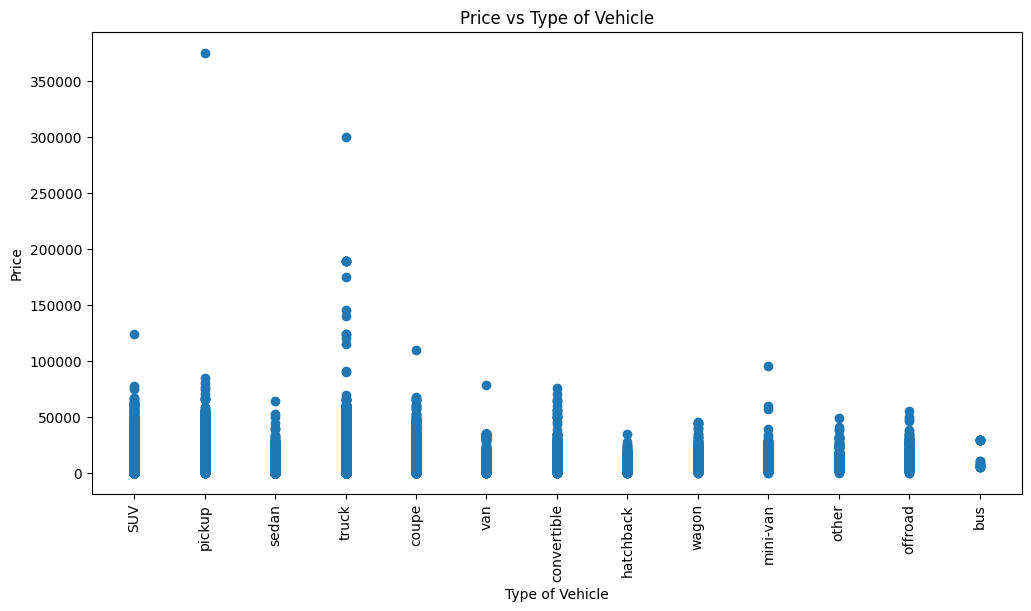

In [664]:
# Create a scatter plot to visualize the relationship between the price and the type of vehicle
plt.figure(figsize=(12, 6))
plt.scatter(df['type'], df['price'])
plt.title('Price vs Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [665]:
# Count the number of ads for each type of vehicle
type_counts = df['type'].value_counts() 

# Display the count of ads for each type of vehicle
display(type_counts)

type
SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: count, dtype: int64

In [666]:
# Count conditions for each type of vehicles
condition_by_type = df.groupby('type')['condition'].value_counts().unstack()

# Fill missing values with 0
condition_by_type = condition_by_type.fillna(0)

# Display the pivot table
display(condition_by_type)

condition,excellent,fair,good,like new,new,salvage
type,,,,,,
SUV,6560.0,333.0,4316.0,1157.0,19.0,20.0
bus,5.0,0.0,19.0,0.0,0.0,0.0
convertible,240.0,14.0,140.0,46.0,5.0,1.0
coupe,855.0,71.0,1150.0,210.0,8.0,9.0
hatchback,547.0,28.0,346.0,118.0,3.0,5.0
mini-van,625.0,51.0,384.0,97.0,3.0,1.0
offroad,97.0,9.0,73.0,35.0,0.0,0.0
other,121.0,9.0,120.0,6.0,0.0,0.0
pickup,3096.0,341.0,2945.0,575.0,10.0,21.0


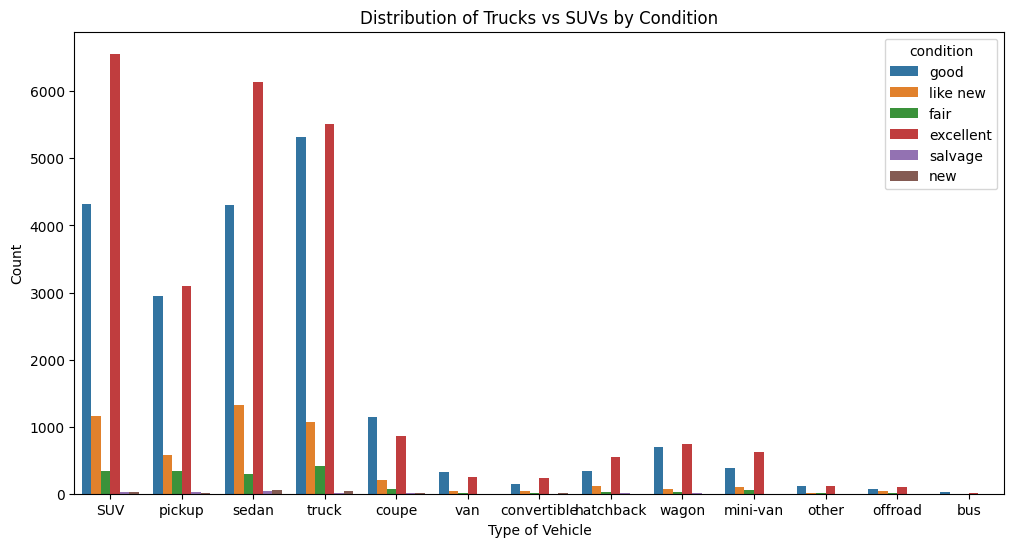

In [700]:
#Create a bar graph to visualize the distribution of trucks versus suvs by condition
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='type', hue='condition')
plt.title('Distribution of Trucks vs SUVs by Condition')
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.show()


We can see that the average sale prices for buses and trucks are the highest while sedans and hatchbacks have the lowest sales prices. We can see that pricing stays consistent for most types of vehicles; however, there is less consistency for trucks. Upon further exploration of the data, we can see that trucks have the second highest number of ads with vehicles available in all conditions. This could contribute to the high variance in pricing for truck ads. 

Type of vehicle is not a good indicator of the condition of a vehicle; however, type can help to narrow down what condition a vehicle will be listed as. For instance, a bus is only listed as being in excellent or good condition. 

In [667]:
# Create a pivot table to calculate the average price for each make of vehicle
make_by_price = df.pivot_table(index='make', values='price', aggfunc='mean')  

# Round the values in the pivot table to 2 decimal places
make_by_price = np.round(make_by_price, 2)

# Order the pivot table by price in descending order
make_by_price = make_by_price.sort_values(by='price', ascending=False)

# Display the pivot table
display(make_by_price)

,price
make,
mercedes-benz,34900.00
ram,18183.62
cadillac,17032.06
gmc,15602.34
chevrolet,14333.43
jeep,12774.38
ford,12697.65
buick,11439.61
bmw,10695.89


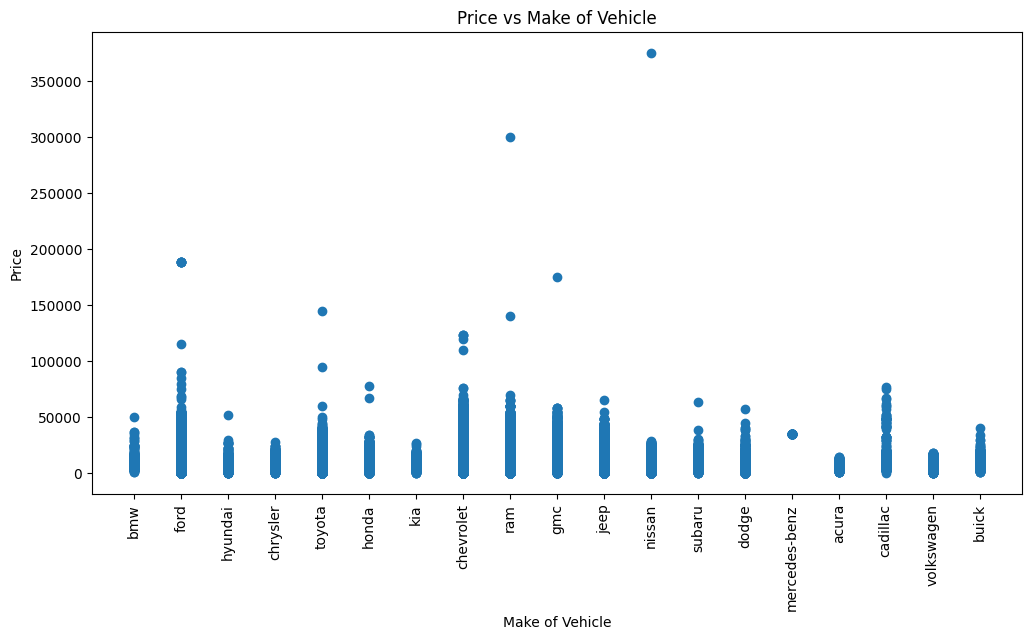

In [668]:
# Create a scatter plot to visualize the relationship between the price and the make of vehicle
plt.figure(figsize=(12, 6)) 
plt.scatter(df['make'], df['price'])
plt.title('Price vs Make of Vehicle')
plt.xlabel('Make of Vehicle')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [669]:
# Count the number of ads for each make of vehicle
make_counts = df['make'].value_counts()

# Display the count of ads for each make of vehicle
display(make_counts)

make
ford             12672
chevrolet        10611
toyota            5445
honda             3485
ram               3316
jeep              3281
nissan            3208
gmc               2378
subaru            1272
dodge             1255
hyundai           1173
volkswagen         869
chrysler           838
kia                585
cadillac           322
buick              271
bmw                267
acura              236
mercedes-benz       41
Name: count, dtype: int64

In [670]:
# Count conditions for each make of vehicles3
condition_by_make = df.groupby('make')['condition'].value_counts().unstack()

# Fill missing values with 0
condition_by_make = condition_by_make.fillna(0)

# Display the pivot table
display(condition_by_make)

condition,excellent,fair,good,like new,new,salvage
make,,,,,,
acura,105.0,9.0,98.0,24.0,0.0,0.0
bmw,160.0,2.0,77.0,28.0,0.0,0.0
buick,155.0,1.0,84.0,31.0,0.0,0.0
cadillac,166.0,6.0,111.0,38.0,0.0,1.0
chevrolet,4820.0,285.0,4337.0,1107.0,51.0,11.0
chrysler,434.0,11.0,302.0,90.0,1.0,0.0
dodge,590.0,63.0,506.0,90.0,2.0,4.0
ford,5762.0,452.0,5490.0,920.0,19.0,29.0
gmc,1130.0,94.0,901.0,244.0,6.0,3.0


The data shows that there is more variance between the make of the vehicles versus the type of vehicles. While there is some consistency in prices, there are more outliers. Mercedes-benz and ram sold for the highest cost while hyundai and acura sold for the lowest prices. Further inspection of the data shows that there were more fords and cheverolets and fewer acuras and mercedes-benz. Rams, fords, and nissans which had the greatest outliers had ads for vehicles in all conditions. Mercedes-benz only had vehicles available in excellent condition. The make a vehicle will not necessarily determine its condition, but certain makes could be used to narrow down what condition a vehicle is most likely to be listed as.

In [671]:
# Create a pivot table that sorts the values of each type of vehicle by make and price in descending order
type_make_price = df.pivot_table(index='type', columns='make', values='price', aggfunc='mean')

# Round the values in the pivot table to 2 decimal places
type_make_price = np.round(type_make_price, 2)

# Fill missing values with 0
type_make_price = type_make_price.fillna(0)

# Display the pivot table
display(type_make_price)


make,acura,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,gmc,honda,hyundai,jeep,kia,mercedes-benz,nissan,ram,subaru,toyota,volkswagen
type,,,,,,,,,,,,,,,,,,,
SUV,4950.00,10953.60,11523.85,17065.73,11905.42,14995.00,10571.43,9630.05,12167.80,8767.38,7807.91,12636.38,9357.02,0.0,9177.86,13630.00,10569.89,11006.44,0.00
bus,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17554.61,0.00,0.00,7500.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
convertible,0.00,0.00,0.00,0.00,17970.13,8221.75,0.00,9866.75,0.00,6950.00,0.00,15181.43,0.00,0.0,0.00,0.00,0.00,3525.00,0.00
coupe,0.00,0.00,0.00,0.00,17469.93,7687.50,16299.44,15652.77,0.00,5709.53,5348.55,0.00,0.00,0.0,6258.64,0.00,5498.50,4107.73,4665.20
hatchback,0.00,6000.00,0.00,0.00,11727.50,3995.00,5800.00,6946.49,0.00,6508.23,6414.86,11433.33,7499.20,0.0,4312.62,0.00,7072.34,6858.62,4223.75
mini-van,0.00,0.00,0.00,0.00,2850.00,7640.20,8525.35,5500.00,0.00,7024.65,3000.00,0.00,5675.00,0.0,0.00,0.00,0.00,10171.31,0.00
offroad,0.00,0.00,0.00,0.00,11844.50,0.00,10475.00,11211.11,26116.67,2825.00,0.00,14375.07,0.00,0.0,5500.00,12500.00,0.00,15398.06,0.00
other,4595.00,0.00,0.00,0.00,14848.10,4833.00,7539.00,12693.45,15000.00,8244.13,8581.17,10775.52,8270.00,0.0,6634.18,17770.62,5647.50,8658.00,6620.00
pickup,0.00,0.00,0.00,18065.00,17237.30,0.00,4480.16,14510.64,15946.61,0.00,0.00,6000.00,3950.00,0.0,19913.53,17712.34,0.00,14360.51,0.00


Most makes had vehicles of the SUV, sedan, and wagon types. 

In [672]:
# Create a pivot table to calculate the average price for each condition of vehicle
pivot_table = df.pivot_table(index='condition', values='price', aggfunc='mean') 

# Round the values in the pivot table to 2 decimal places
pivot_table = np.round(pivot_table, 2)

# Order the pivot table by price in descending order
pivot_table = pivot_table.sort_values(by='price', ascending=False)

# Display the pivot table
pivot_table

,price
condition,
new,26050.30
like new,16677.45
excellent,12806.67
good,10877.44
salvage,4242.30
fair,3386.50


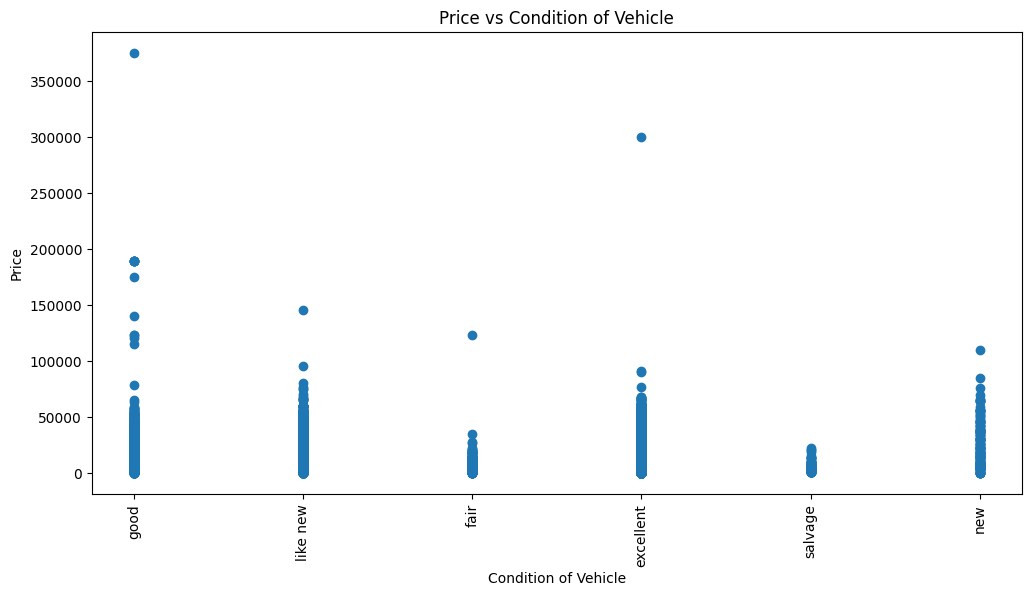

In [673]:
# Create a scatter plot to visualize the relationship between the price and the condition of vehicle
plt.figure(figsize=(12, 6))
plt.scatter(df['condition'], df['price'])
plt.title('Price vs Condition of Vehicle')
plt.xlabel('Condition of Vehicle')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [717]:
# Create a pivot table to show the relationship between the condition and the median price of the vehicle
condition_by_price = df.pivot_table(index='condition', values='price', aggfunc='median')

# Round the values in the pivot table to 2 decimal places
condition_by_price = np.round(condition_by_price, 2)

# Order the pivot table by price in descending order
condition_by_price = condition_by_price.sort_values(by='price', ascending=False)

# Display the pivot table
condition_by_price

,price
condition,
new,21999.0
like new,13995.0
excellent,10495.0
good,7900.0
fair,2500.0
salvage,2500.0


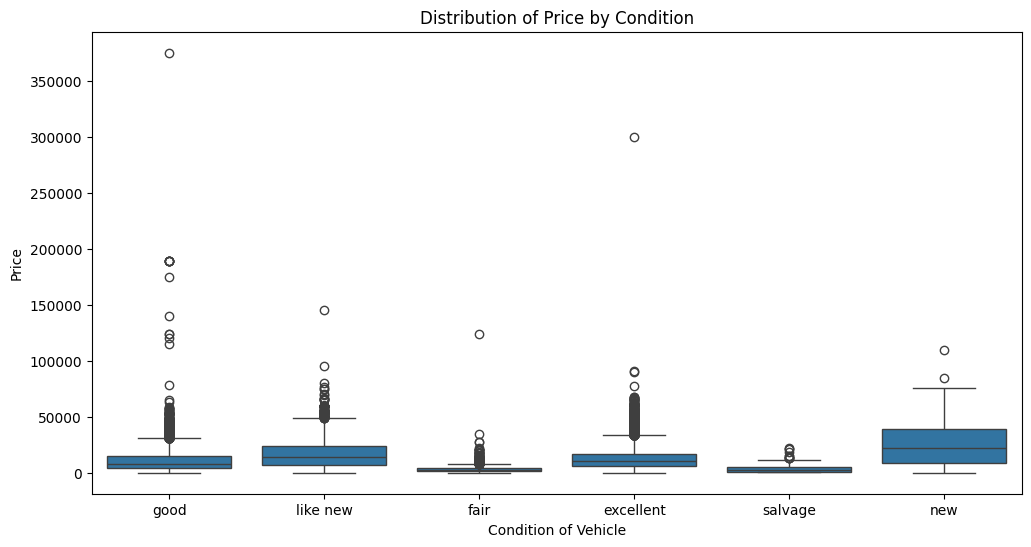

In [715]:
# Create a box plot to visualize the distribution of price by condition
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='condition', y='price')
plt.title('Distribution of Price by Condition')
plt.xlabel('Condition of Vehicle')
plt.ylabel('Price')
plt.show()

There was some variance of price based on conditions with the most outliers for good and excellent conditions. The most consistent pricing was found in the salvaged condition. Price could be used to predict what condition a car is likely to be sold in. A car listed at a higher price is most likely to be advertized as new or like new while cars listed at a lower price are more likely to be advertized as salvage or fair. 

In [674]:
# Create a pivot table to show the average vehicle age for each condition
condition_by_age = df.pivot_table(index='condition', values='vehicle_age', aggfunc='mean')

# Round the values in the pivot table to 2 decimal places
condition_by_age = np.round(condition_by_age, 2)

# Display the pivot table
condition_by_age 

,vehicle_age
condition,
excellent,7.66
fair,15.79
good,9.66
like new,6.12
new,4.74
salvage,12.20


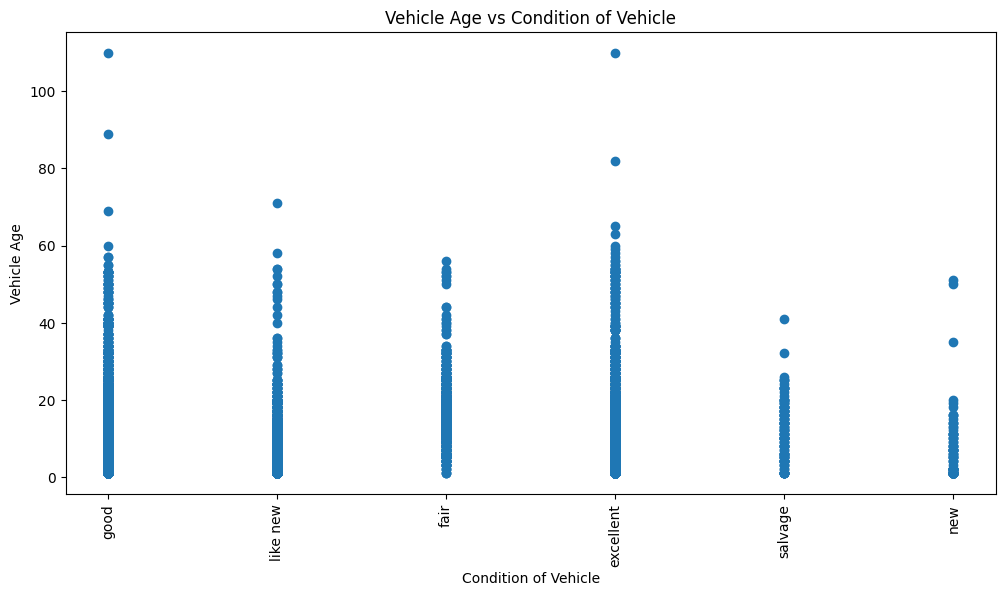

In [675]:
# Create a scatter plot to visualize the relationship between the vehicle age and the condition of vehicle
plt.figure(figsize=(12, 6))
plt.scatter(df['condition'], df['vehicle_age'])
plt.title('Vehicle Age vs Condition of Vehicle')
plt.xlabel('Condition of Vehicle')
plt.ylabel('Vehicle Age')
plt.xticks(rotation=90)
plt.show()

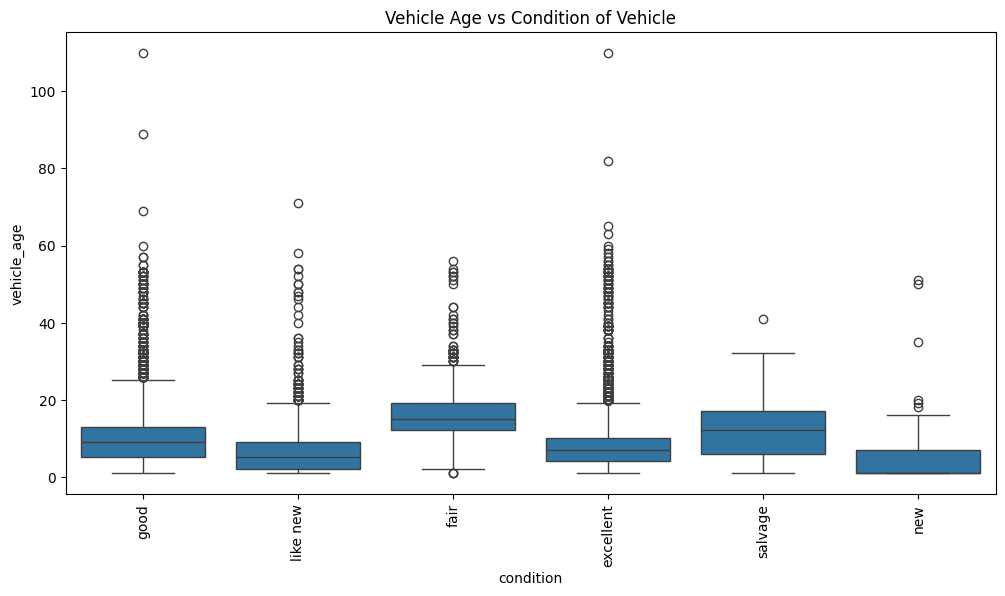

In [676]:
# Create boxplot to visualize the relationship between the vehicle age and the condition of vehicle
plt.figure(figsize=(12, 6))
plt.title('Vehicle Age vs Condition of Vehicle')
sns.boxplot(x='condition', y='vehicle_age', data=df)
plt.xticks(rotation=90)
plt.show()

In [718]:
#Create a pivot table to show the relationship between the condition and median age of the vehicle
condition_by_age = df.pivot_table(index='condition', values='vehicle_age', aggfunc='median')

# Round the values in the pivot table to 2 decimal places
condition_by_age = np.round(condition_by_age, 2)

# Order the pivot table by age in descending order
condition_by_age = condition_by_age.sort_values(by='vehicle_age', ascending=False)

# Display the pivot table
condition_by_age

,vehicle_age
condition,
fair,15.0
salvage,12.0
good,9.0
excellent,7.0
like new,5.0
new,1.0


There is a lot of variance that occurs with the vehicles age and its conditions. While the average age for most vehicles ads was under 20 years, with most conditions there are many outliers. Good, excellent, and like new conditions showed the most outliers while salvage condition shows the least amount of outliers. Age could be a predictor of the condition of a vehicle. Vehicles listed as fair or salvage had an overall higher average age while cars listed as new or like new had an overall lower age.

In [677]:
# Create a pivot table to show the number of ads each year
ads_by_year = df['date_posted'].dt.year.value_counts().sort_index()

# Display the pivot table
ads_by_year

date_posted
2018    35683
2019    15842
Name: count, dtype: int64

In [679]:
# Create a pivot table to show the number of vehicles sold each month per year
ads_by_month = df['month_year'].value_counts().sort_index()

#

# Display the pivot table
ads_by_month


month_year
2018-05    4503
2018-06    4216
2018-07    4471
2018-08    4480
2018-09    4452
2018-10    4643
2018-11    4354
2018-12    4564
2019-01    4452
2019-02    4014
2019-03    4559
2019-04    2817
Name: count, dtype: int64

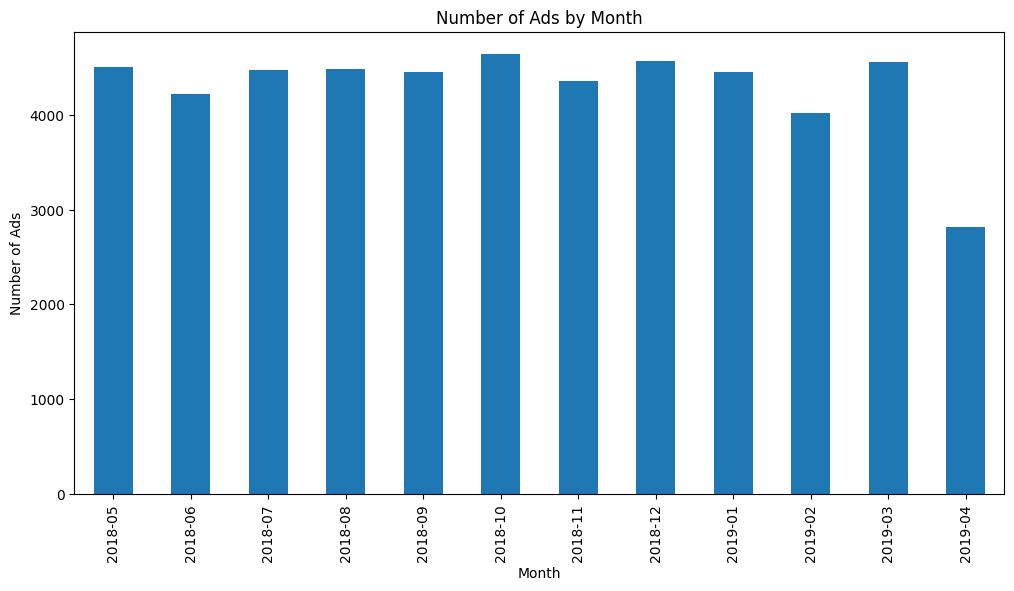

In [ ]:
# Create a bar graph to visualize the distribution of car sales by month
plt.figure(figsize=(12, 6))
ads_by_month.plot(kind='bar')
plt.title('Number of Ads by Month')
plt.xlabel('Month')
plt.ylabel('Number of Ads')
plt.xticks(rotation=90)
plt.show()


The number of cars being advertized per month remains fairly consistent with the month 2019-04 having a significantly smaller number of cars being advertized. The month with the most car ads was the previous month 2019-03

In [ ]:
# Create a pivot table showing the average number of days it takes to sell a vehicle by the vehicle's condition
days_to_sell = df.groupby('condition')['days_listed'].mean()

# Round the values in the pivot table to 2 decimal places
days_to_sell = np.round(days_to_sell, 2)

# Display the pivot table
days_to_sell

condition
excellent    39.61
fair         39.12
good         39.63
like new     39.17
new          37.11
salvage      39.01
Name: days_listed, dtype: float64

In [690]:
# Create a pivot table showing the median number of days it takes to sell a vehicle by the vehicle's condition
days_to_sell_median = df.groupby('condition')['days_listed'].median()

# Display the pivot table
days_to_sell_median

condition
excellent    33.0
fair         33.0
good         33.0
like new     33.0
new          35.0
salvage      33.0
Name: days_listed, dtype: float64

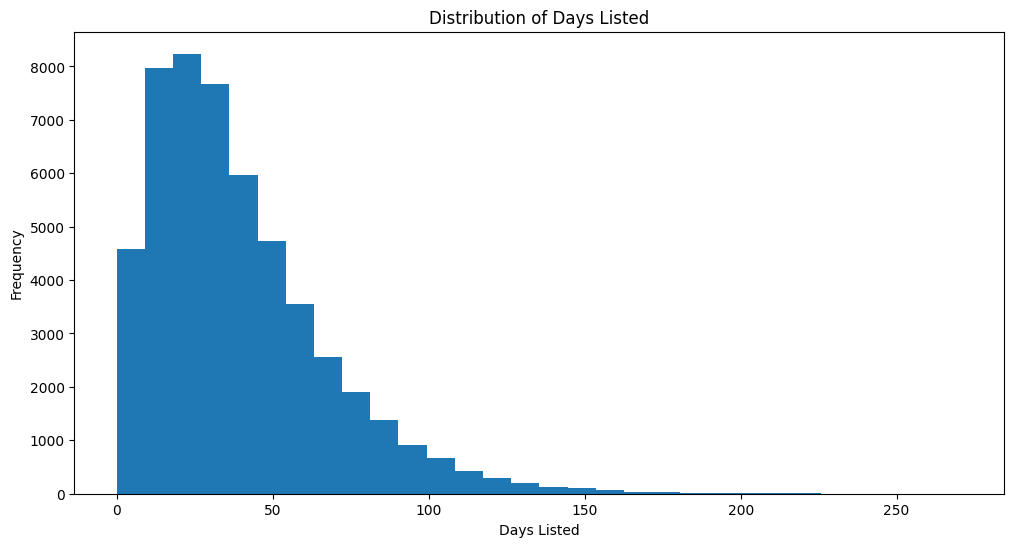

In [689]:
# Create a histogragm to visualize the distribution of the days listed
plt.figure(figsize=(12, 6))
plt.hist(df['days_listed'], bins=30)
plt.title('Distribution of Days Listed')
plt.xlabel('Days Listed')
plt.ylabel('Frequency')
plt.show()

Most cars were advertized between 20-40 days. The condition of the car was not a significant factor in the number of days that the ad was active.

In [683]:
# Create a pivot table showing the number of cars sold in each condition per month
condition_by_month = df.groupby('month_year')['condition'].value_counts().unstack()

# Fill missing values with 0
condition_by_month = condition_by_month.fillna(0)

# Display the pivot table
condition_by_month

condition,excellent,fair,good,like new,new,salvage
month_year,,,,,,
2018-05,2145,132,1782,421,9,14
2018-06,2060,138,1646,341,13,18
2018-07,2178,142,1720,415,7,9
2018-08,2176,141,1712,434,8,9
2018-09,2097,137,1773,424,13,8
2018-10,2232,136,1808,440,13,14
2018-11,2085,148,1724,379,15,3
2018-12,2248,160,1747,391,12,6
2019-01,2124,128,1753,421,16,10


<Figure size 1200x600 with 0 Axes>

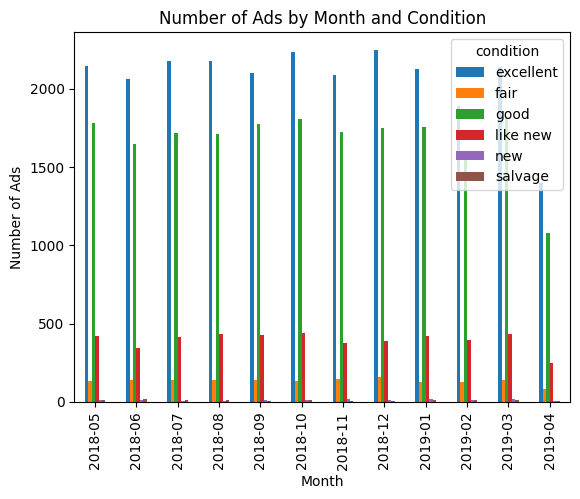

In [685]:
# Create a bar graph to visualize the number of cars sold in each month per condition
plt.figure(figsize=(12, 6))
condition_by_month.plot(kind='bar')
plt.title('Number of Ads by Month and Condition')
plt.xlabel('Month')
plt.ylabel('Number of Ads')
plt.xticks(rotation=90)
plt.show()

There were more cars ads of cars in good and excellent condition every month. The pattern of cars ads by condition remained consistent from month to month.

In [701]:
# Create a pivot table showing the condition of the vehicle based on the average odometer reading
condition_by_odometer = df.groupby('condition')['odometer'].mean()

# Round the values in the pivot table to 2 decimal places
condition_by_odometer = np.round(condition_by_odometer, 2)

# Display the pivot table
condition_by_odometer

condition
excellent    106310.69
fair         182848.50
good         129778.73
like new      78437.33
new           39010.79
salvage      141179.13
Name: odometer, dtype: float64

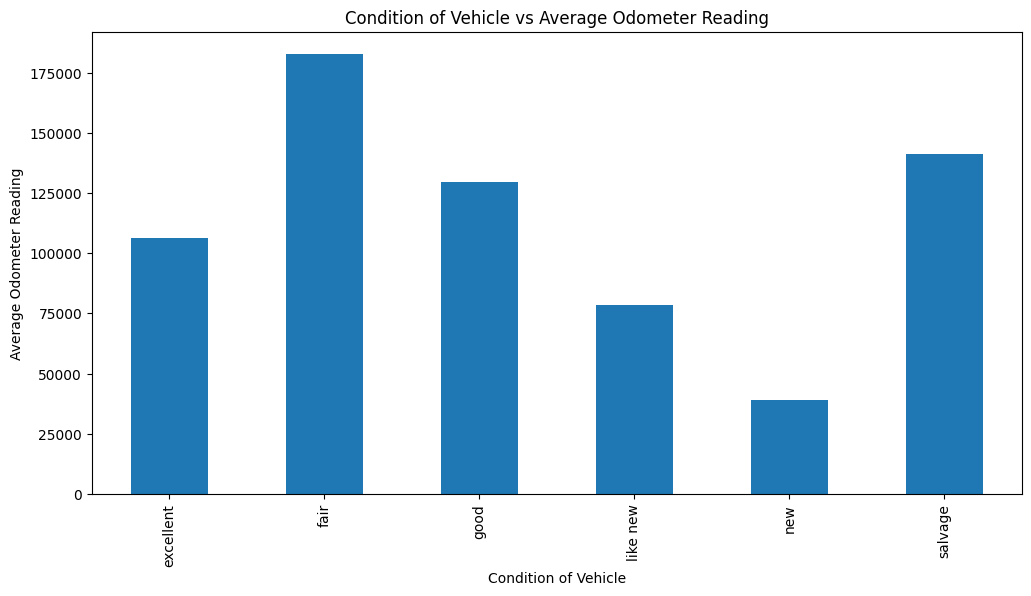

In [708]:
# Create a bar graph to visualize the relationship between the condition of the vehicle and the average odometer reading
plt.figure(figsize=(12, 6))
condition_by_odometer.plot(kind='bar')
plt.title('Condition of Vehicle vs Average Odometer Reading')
plt.xlabel('Condition of Vehicle')
plt.ylabel('Average Odometer Reading')
plt.xticks(rotation=90)
plt.show()



In [714]:
# Calculate the relationship between condition and the median odometer reading
condition_by_odometer_median = df.groupby('condition')['odometer'].median()

# Display the pivot table
condition_by_odometer_median

condition
excellent    104230.0
fair         181613.0
good         129000.0
like new      72982.0
new            8002.0
salvage      142673.0
Name: odometer, dtype: float64

The data shows that cars listed as new or like new have the lowest average odometer readings. Cars in excellent condition have a higher average odometer reading than that of cars listed in the new or like new condition. Cars listed in fair condition have the highest average odometer reading. Odometer reading could be a predictor of what condition a car is listed as.

In [ ]:
# Create a pivot table to show the relationship between the condition of the vehicle and the type of transmission
condition_by_transmission = df.groupby('condition')['transmission'].value_counts().unstack()

# Fill missing values with 0
condition_by_transmission = condition_by_transmission.fillna(0)

# Display the pivot table
condition_by_transmission

transmission,automatic,manual,other
condition,,,
excellent,23081.0,1269.0,423.0
fair,1426.0,176.0,5.0
good,17692.0,1118.0,1335.0
like new,4462.0,250.0,30.0
new,135.0,7.0,1.0
salvage,106.0,9.0,0.0


<Figure size 1200x600 with 0 Axes>

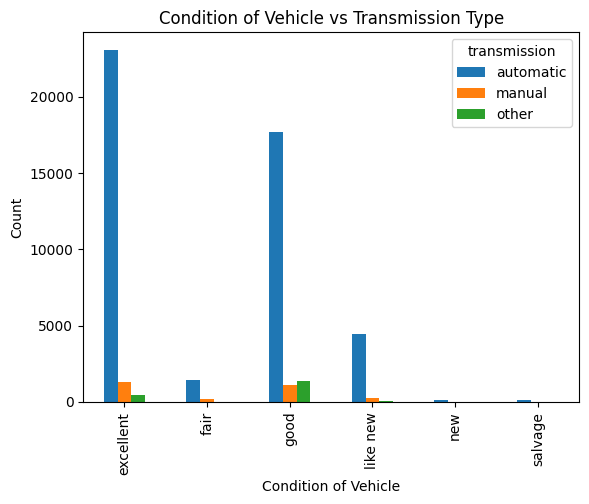

In [710]:
# Create a bar graph to visualize the relationship between the condition of the vehicle and the transmission type
plt.figure(figsize=(12, 6))
condition_by_transmission.plot(kind='bar')
plt.title('Condition of Vehicle vs Transmission Type')
plt.xlabel('Condition of Vehicle')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Based on the data, cars of all conditions sold are most likely to have an automatic transition. But overall, transition is not an good indicator to determine the condition of a car.

In [711]:
# Create a pivot table to show the relationship between the condition of the vehicle and cylinders
condition_by_cylinders = df.groupby('condition')['cylinders'].value_counts().unstack()

# Fill missing values with 0
condition_by_cylinders = condition_by_cylinders.fillna(0)

# Display the pivot table
condition_by_cylinders

cylinders,3,4,5,6,8,10,12
condition,,,,,,,
excellent,17.0,8131.0,144.0,8160.0,7940.0,379.0,2.0
fair,2.0,363.0,12.0,506.0,718.0,6.0,0.0
good,8.0,5265.0,116.0,7182.0,7423.0,151.0,0.0
like new,5.0,1631.0,22.0,1526.0,1546.0,12.0,0.0
new,1.0,58.0,0.0,29.0,54.0,1.0,0.0
salvage,1.0,51.0,0.0,32.0,31.0,0.0,0.0


<Figure size 1200x600 with 0 Axes>

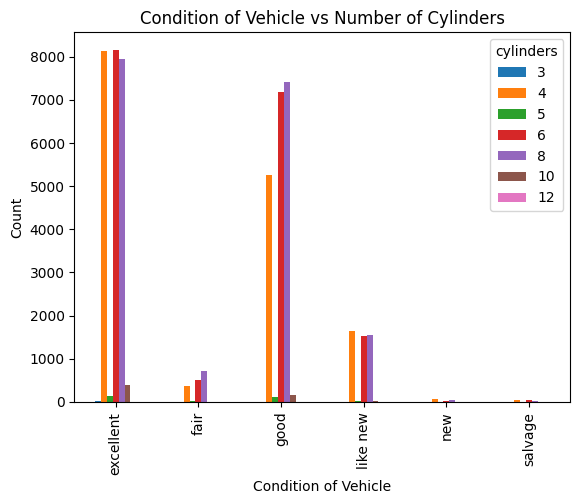

In [712]:
# Create a bar graph to visualize the relationship between the condition of the vehicle and the number of cylinders
plt.figure(figsize=(12, 6))
condition_by_cylinders.plot(kind='bar')
plt.title('Condition of Vehicle vs Number of Cylinders')
plt.xlabel('Condition of Vehicle')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The data shows that most cars advertised had between 4 and 8 cylinders. Cars with 10 cylinders are most likely to be listed in excellent or good condition. Only with 12 cylinders were only listed as excellent. A cylinder count of 10 or more could be used as an indicator of whether a car is listed in excellent or good condition. 

Findings

Type of vehicle is not a good indicator of the condition of a vehicle; however, type can help to narrow down what condition a vehicle will be listed as. For instance, a bus is only listed as being in excellent or good condition. 

Inspection of the data shows that there were more fords and cheverolets and fewer acuras and mercedes-benz. Rams, fords, and nissans which had the greatest outliers had ads for vehicles in all conditions. Mercedes-benz only had vehicles available in excellent condition. The make a vehicle will not necessarily determine its condition, but certain makes could be used to narrow down what condition a vehicle is most likely to be listed as.

There was some variance of price based on conditions with the most outliers for good and excellent conditions. The most consistent pricing was found in the salvaged condition. Price could be used to predict what condition a car is likely to be sold in. A car listed at a higher price is most likely to be advertized as new or like new while cars listed at a lower price are more likely to be advertized as salvage or fair. 

There is a lot of variance that occurs with the vehicles age and its conditions. While the average age for most vehicles ads was under 20 years, with most conditions there are many outliers. Good, excellent, and like new conditions showed the most outliers while salvage condition shows the least amount of outliers. Age could be a predictor of the condition of a vehicle. Vehicles listed as fair or salvage had an overall higher average age while cars listed as new or like new had an overall lower age.

The data shows that cars listed as new or like new have the lowest average odometer readings. Cars in excellent condition have a higher average odometer reading than that of cars listed in the new or like new condition. Cars listed in fair condition have the highest average odometer reading. Odometer reading could be a predictor of what condition a car is listed as.

Based on the data, cars of all conditions sold are most likely to have an automatic transition. But overall, transition is not an good indicator to determine the condition of a car.

The data shows that most cars advertised had between 4 and 8 cylinders. Cars with 10 cylinders are most likely to be listed in excellent or good condition. Only with 12 cylinders were only listed as excellent. A cylinder count of 10 or more could be used as an indicator of whether a car is listed in excellent or good condition. 

Most cars were advertized between 20-40 days. The condition of the car was not a significant factor in the number of days that the ad was active.

There were more cars ads of cars in good and excellent condition every month. The pattern of cars ads by condition remained consistent from month to month.

Summary of Findings

Most factors about an advertized car did not give a clear indicator of what condition a car would be listed as; however, factors such as make, type, and transmission could be used to narrow down what condition a car was most likely to be listed as. 

Price, age, and odometer readings were better predictors of what condition a car might be listed as especially when determining cars that were in new, like new, fair, or salvaged conditions. It was harder to determine whether a car would be listed in good or excellent conditions based on these factors.

Cylinders would be used to determine whether a car was listed in good or excellent condition. However, it could not be used to determine the condition of most vehicles.

The condition of a vehicle did not determine the number of days that vehicle was active on the site.

Most cars advertized were in good or excellent condition. The pattern of car ads by condition remained consistent over the 12 month period of time. 

